In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
base_model = tf.keras.applications.NASNetLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [19]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='sigmoid')(x)

In [21]:
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory('/kaggle/input/melanoma-cancer-dataset/train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory('/kaggle/input/melanoma-cancer-dataset/test',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [26]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)

Epoch 1/10
371/371 [==============================] - 206s 553ms/step - loss: 0.3967 - accuracy: 0.8251 - val_loss: 0.3350 - val_accuracy: 0.8745
Epoch 2/10
371/371 [==============================] - 162s 437ms/step - loss: 0.3532 - accuracy: 0.8449 - val_loss: 0.3026 - val_accuracy: 0.8816
Epoch 3/10
371/371 [==============================] - 161s 433ms/step - loss: 0.3408 - accuracy: 0.8516 - val_loss: 0.2840 - val_accuracy: 0.8947
Epoch 4/10
371/371 [==============================] - 161s 434ms/step - loss: 0.3265 - accuracy: 0.8585 - val_loss: 0.3282 - val_accuracy: 0.8508
Epoch 5/10
371/371 [==============================] - 164s 442ms/step - loss: 0.3241 - accuracy: 0.8602 - val_loss: 0.3036 - val_accuracy: 0.8740
Epoch 6/10
371/371 [==============================] - 162s 436ms/step - loss: 0.3090 - accuracy: 0.8622 - val_loss: 0.2965 - val_accuracy: 0.8750
Epoch 7/10
371/371 [==============================] - 162s 435ms/step - loss: 0.3045 - accuracy: 0.8697 - val_loss: 0.2700 -

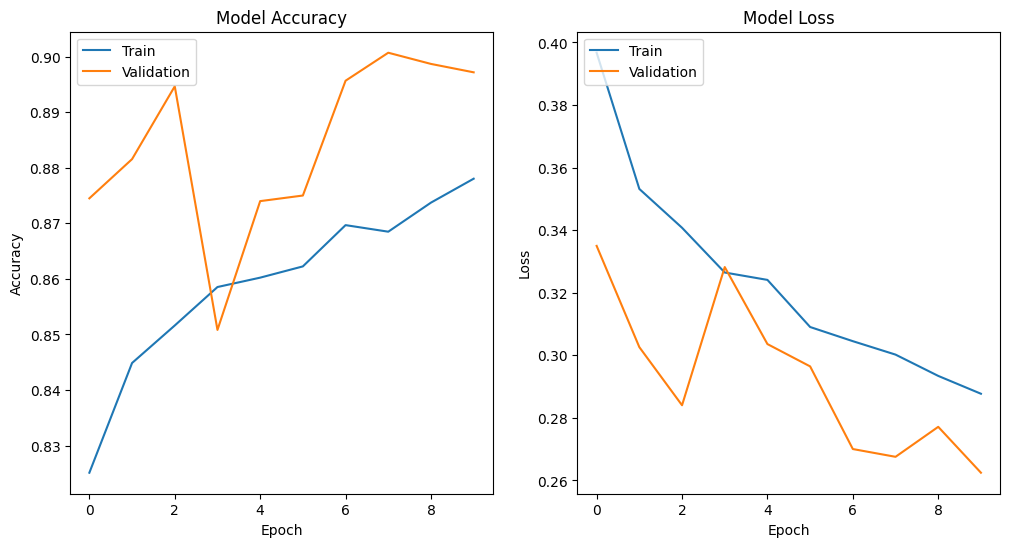

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
test_generator

In [34]:
predictions = model.predict(test_generator)
class_labels = [0 if prob < 0.5 else 1 for prob in predictions]
print(class_labels)

63/63 [==============================] - 30s 390ms/step
[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1

In [38]:
max(history.history['accuracy'])

0.8780282139778137